# Multiple learning curves


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc
from srcs.train import train_model
from srcs import train

seed = 42

In [9]:
X_train, X_valid, t_train, t_valid = get_wdbc(csv_path="../data/data.csv", train_size=0.8)


train Model_Small

Metrics: 
 Train [Accuracy:0.9627, Precision:0.9636, Recall:0.9353, F1:0.9493]
 Valid [Accuracy:0.9381, Precision:0.9730, Recall:0.8571, F1:0.9114]

train Model_Mid

Metrics: 
 Train [Accuracy:0.9846, Precision:0.9880, Recall:0.9706, F1:0.9792]
 Valid [Accuracy:0.9646, Precision:0.9750, Recall:0.9286, F1:0.9512]

train Model_Big

Metrics: 
 Train [Accuracy:0.9803, Precision:0.9548, Recall:0.9941, F1:0.9741]
 Valid [Accuracy:0.9646, Precision:0.9130, Recall:1.0000, F1:0.9545]


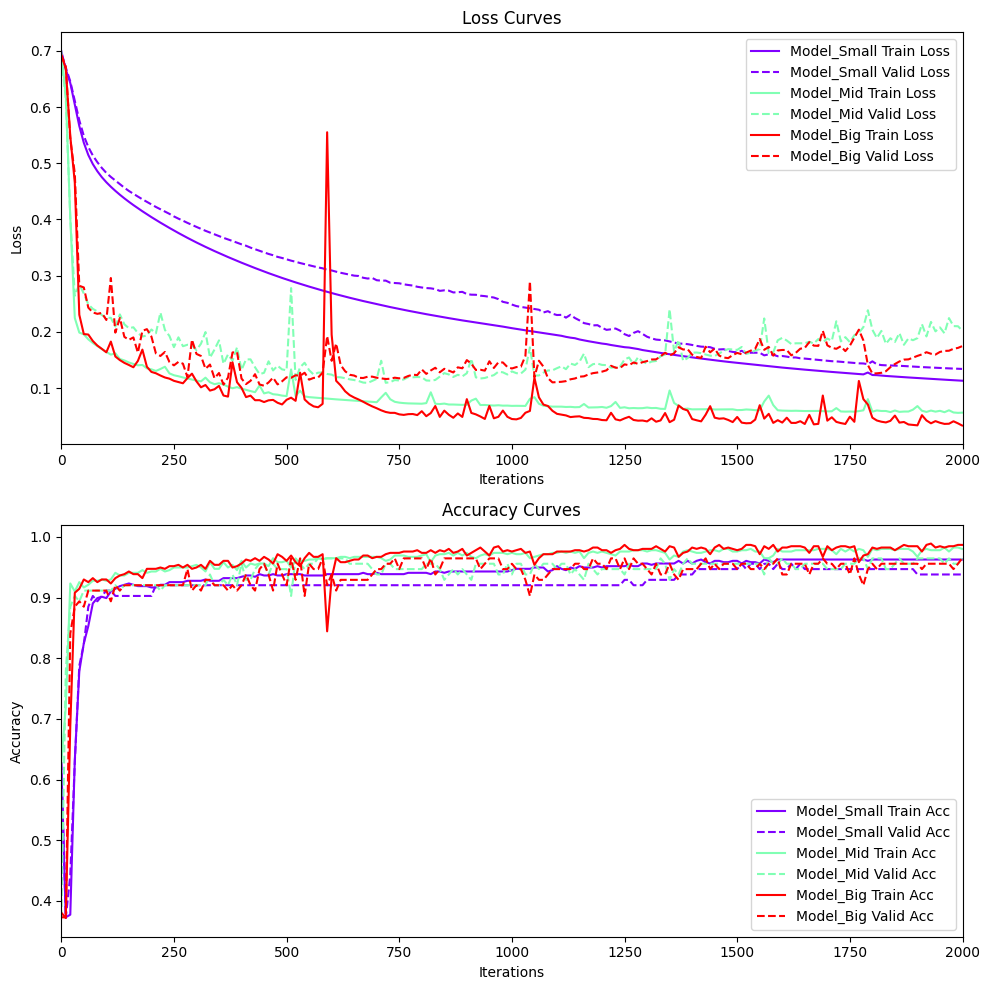

In [12]:
model_small = Sequential(
    layers=[
        Dense(in_features=30, out_features=5, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=5, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

model_mid = Sequential(
    layers=[
        Dense(in_features=30, out_features=100, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

model_big = Sequential(
    layers=[
        Dense(in_features=30, out_features=300, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=300, out_features=200, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=200, out_features=200, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

models = {
    "Model_Small"  : model_small,
    "Model_Mid"    : model_mid,
    "Model_Big"    : model_big,
}


models_results = []
max_itr = 1000
for name, model in models.items():
    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)



train Model_ReLU

Metrics: 
 Train [Accuracy:0.9649, Precision:0.9583, Recall:0.9471, F1:0.9527]
 Valid [Accuracy:0.9292, Precision:0.9474, Recall:0.8571, F1:0.9000]

train Model_Sigmoid

Metrics: 
 Train [Accuracy:0.9737, Precision:0.9647, Recall:0.9647, F1:0.9647]
 Valid [Accuracy:0.9558, Precision:0.9512, Recall:0.9286, F1:0.9398]


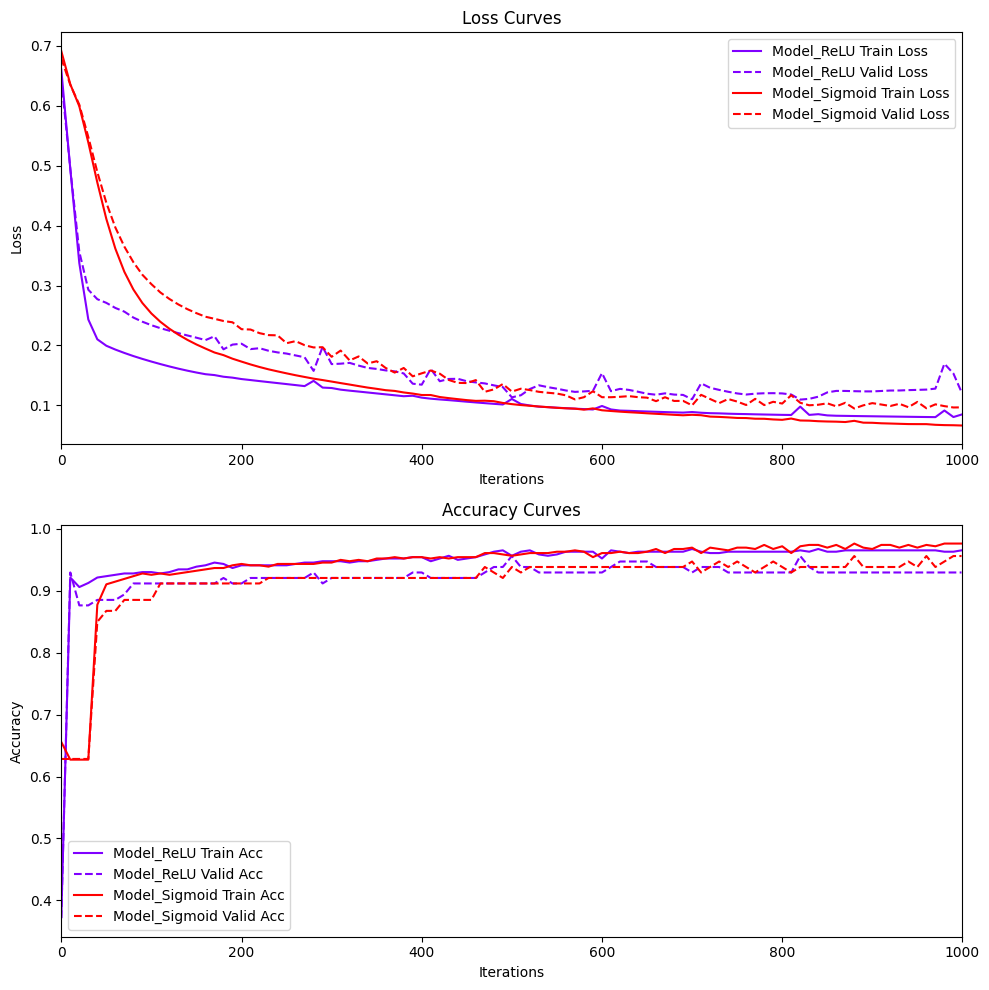

In [14]:
model_relu = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

model_sigmoid = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=Sigmoid, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

models = {
    "Model_ReLU"    : model_relu,
    "Model_Sigmoid" : model_sigmoid,
}


models_results = []
max_itr = 1000
for name, model in models.items():
    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
